In [67]:
%pylab inline
import h5py
import programas as pg

Populating the interactive namespace from numpy and matplotlib


In [37]:
masa = '2e-03'
hf = h5py.File('/mnt/projects/bias_mock/galaxies/galposz_RedSample_'+masa+'.hdf5','r') 
posz = hf['Subhalo/SubhaloPos'][()]

hf = h5py.File('/mnt/projects/bias_mock/galaxies/galpos_RedSample_'+masa+'.hdf5','r') 
posr = hf['Subhalo/SubhaloPos'][()]

In [41]:
maskz, = np.where(posz[:,2]>1400)
maskr, = np.where(posr[:,2]>1400)

print(maskr.shape)
print(maskz.shape)

(162294,)
(158384,)


(0.0, 200.0)

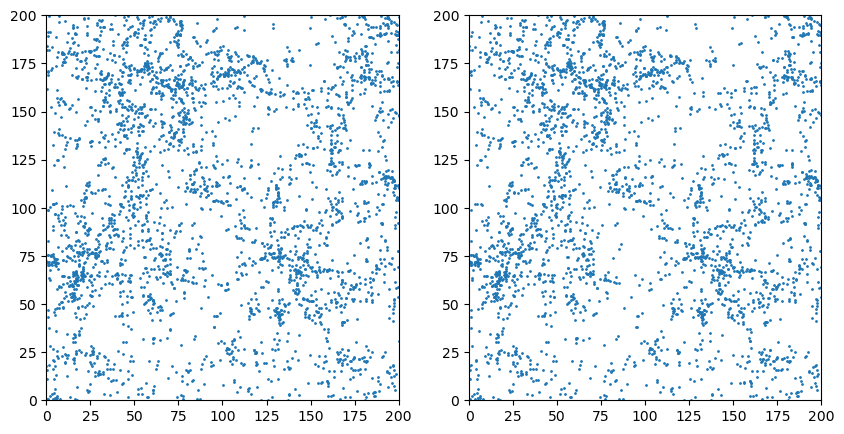

In [42]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(posr[maskr,0],posr[maskr,1],ls='none',marker='o',markersize=1)
plt.xlim(0,200)
plt.ylim(0,200)

plt.subplot(122)
plt.plot(posz[maskz,0],posz[maskz,1],ls='none',marker='o',markersize=1)
plt.xlim(0,200)
plt.ylim(0,200)

(0.0, 100.0)

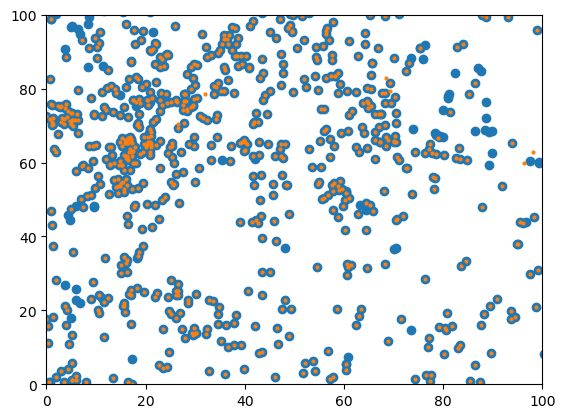

In [43]:
plt.plot(posr[maskr,0],posr[maskr,1],ls='none',marker='o',markersize=6)
plt.plot(posz[maskz,0],posz[maskz,1],ls='none',marker='o',markersize=2)
plt.xlim(0,100)
plt.ylim(0,100)

In [44]:
posr

array([[1022.3054  ,  508.27045 ,   83.0824  ],
       [1022.2539  ,  508.37817 ,   84.17737 ],
       [1023.1959  ,  508.82642 ,   83.93994 ],
       ...,
       [ 307.28644 , 1080.9529  ,    7.487473],
       [ 590.2216  , 1024.4957  ,  590.4735  ],
       [ 274.85687 , 1111.3584  ,   24.887497]], dtype=float32)

In [46]:
posz2 = posz.astype(np.float32)

In [47]:
posz

array([[1022.30541992,  508.27044678,   79.56935453],
       [1022.25390625,  508.37817383,   80.42223526],
       [1023.19592285,  508.82641602,   74.73187956],
       ...,
       [ 307.28643799, 1080.95288086,    2.38012889],
       [ 590.22161865, 1024.49572754,  584.29890581],
       [ 274.85687256, 1111.35839844,   21.48947568]])

In [48]:
posz2

array([[1022.3054   ,  508.27045  ,   79.56935  ],
       [1022.2539   ,  508.37817  ,   80.42223  ],
       [1023.1959   ,  508.82642  ,   74.73188  ],
       ...,
       [ 307.28644  , 1080.9529   ,    2.3801289],
       [ 590.2216   , 1024.4957   ,  584.2989   ],
       [ 274.85687  , 1111.3584   ,   21.489475 ]], dtype=float32)

In [58]:
import smoothing_library as SL
import MAS_library as MASL

MAS = 'NGP'
fbines = 540
delta = np.zeros((fbines,fbines,fbines), dtype=np.float32)
MASL.MA(posz2, delta, 1440, MAS, verbose=False)
# transformo a campo de contraste densidad
delta /= np.mean(delta, dtype=np.float32);  delta -= 1.0


In [59]:
np.min(delta)

-1.0

In [65]:
def generar_lista(rmin, rmax):
    # Lista que va de 1 a rmin incrementando de a 1
    primera_parte = list(range(1, rmin + 1))
    
    # Lista que va de rmin a rmax incrementando de a 0.25
    segunda_parte = [rmin + 0.25 * i for i in range(0, int((rmax - rmin) / 0.25) + 1)]
    
    # Combinar ambas listas
    lista_completa = primera_parte + segunda_parte
    
    return np.array(lista_completa).astype(np.float32)

In [68]:
for i in generar_lista(6,6+50):
    print(i)

1.0
2.0
3.0
4.0
5.0
6.0
6.0
6.25
6.5
6.75
7.0
7.25
7.5
7.75
8.0
8.25
8.5
8.75
9.0
9.25
9.5
9.75
10.0
10.25
10.5
10.75
11.0
11.25
11.5
11.75
12.0
12.25
12.5
12.75
13.0
13.25
13.5
13.75
14.0
14.25
14.5
14.75
15.0
15.25
15.5
15.75
16.0
16.25
16.5
16.75
17.0
17.25
17.5
17.75
18.0
18.25
18.5
18.75
19.0
19.25
19.5
19.75
20.0
20.25
20.5
20.75
21.0
21.25
21.5
21.75
22.0
22.25
22.5
22.75
23.0
23.25
23.5
23.75
24.0
24.25
24.5
24.75
25.0
25.25
25.5
25.75
26.0
26.25
26.5
26.75
27.0
27.25
27.5
27.75
28.0
28.25
28.5
28.75
29.0
29.25
29.5
29.75
30.0
30.25
30.5
30.75
31.0
31.25
31.5
31.75
32.0
32.25
32.5
32.75
33.0
33.25
33.5
33.75
34.0
34.25
34.5
34.75
35.0
35.25
35.5
35.75
36.0
36.25
36.5
36.75
37.0
37.25
37.5
37.75
38.0
38.25
38.5
38.75
39.0
39.25
39.5
39.75
40.0
40.25
40.5
40.75
41.0
41.25
41.5
41.75
42.0
42.25
42.5
42.75
43.0
43.25
43.5
43.75
44.0
44.25
44.5
44.75
45.0
45.25
45.5
45.75
46.0
46.25
46.5
46.75
47.0
47.25
47.5
47.75
48.0
48.25
48.5
48.75
49.0
49.25
49.5
49.75
50.0
50.25
50.5
50.75
51